In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'BHP [MW]')

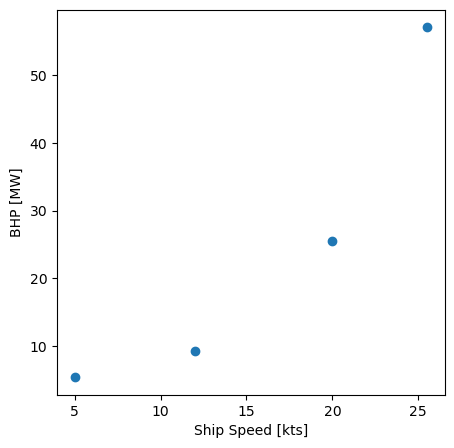

In [24]:
speeds = np.array([5, 12, 20, 25.5])
duration_frac = np.array([.2, .6, .15, .05])
num_days_underway = 183
break_powers = np.array([5406, 9341, 25461, (62154 + 52051)/2]) # kW

plt.figure(figsize=(5,5))
plt.scatter(speeds, break_powers/1000)
plt.xlabel('Ship Speed [kts]')
plt.ylabel('BHP [MW]')

Text(0, 0.5, 'Days per Year')

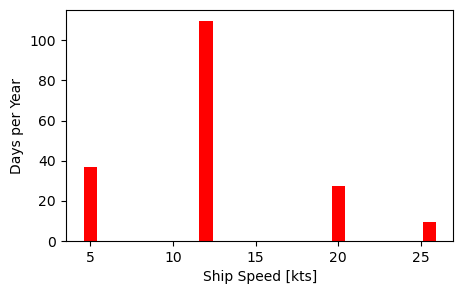

In [25]:
plt.figure(figsize=(5,3))
plt.bar(speeds, num_days_underway*duration_frac, color='red')
plt.xlabel('Ship Speed [kts]')
plt.ylabel('Days per Year')

In [31]:
# Steam Section 
sfc_100_steam = 289 # g/kwhr
sfc_100_ssg = 242
shift = sfc_100_steam - sfc_100_ssg
fraction_load = break_powers / break_powers[-1]
print(f'For the following powers: {break_powers}')
print(f'The MCR is                {np.round(fraction_load*100, 3)} %')
sfc_steam = np.array([415, 400, 300, 242]) + shift

# calculate the fuel rates at certain speeds 
mdot_steam = sfc_steam*(1/60**2)*(1/1000)*break_powers
print(f'mdots: {mdot_steam} kg/s')

m_steam_annual = mdot_steam*num_days_underway*duration_frac*24*60**2
print(f'm_steam: {m_steam_annual/1000} Ton')
mtot_steam = np.sum(m_steam_annual)

print(f'Total fuel used in the propulsion fuel rate is: {mtot_steam/1000} Ton')


For the following powers: [ 5406.   9341.  25461.  57102.5]
The MCR is                [  9.467  16.358  44.588 100.   ] %
mdots: [0.69377    1.15984083 2.4541575  4.58406181] kg/s
m_steam: [ 2193.8672448 11003.0852304  5820.4762596  3623.975901 ] Ton
Total fuel used in the propulsion fuel rate is: 22641.404635799998 Ton


In [52]:
# As-is electrical generation 

P_avg_el = 4747 # kW
P_WB = 7272 # kW

num_steam_elec = 5
num_diesel_elec = 2

# operation powers
P_steam_elec_100 = 2500
P_diesel_elec_100 = 2000

# total_installed_electric_capacity = num_steam_elec*P_steam_elec_100 + num_diesel_elec*P_diesel_elec_100
# print(f'Total installed electrical power: {total_installed_electric_capacity} kW')

# P_steam_elec_avg = (P_steam_elec_100/total_installed_electric_capacity)*P_avg_el
# print(f'Power per steam engine: {P_steam_elec_avg} kW')
# MCR_steam_elec_avg = P_steam_elec_avg/P_steam_elec_100
# print(f'MCR for steam electric power plant at average load: {MCR_steam_elec_avg}')
# sfc_steam_elec = 325 + shift
# print(f'sfc for steam electric generator: {sfc_steam_elec}')
# # total fuel mass used by the 5 steam electric generators
# m_steam_elec = sfc_steam_elec/(1000*60**2)*P_steam_elec_avg*num_days_underway*24*60**2
# print(f'Total fuel used to supply steam electric power generator: {m_steam_elec/1000} Ton')

# print('\n----------------')
# P_diesel_elec_avg = (P_diesel_elec_100/total_installed_electric_capacity)*P_avg_el
# print(f'Power per diesel engine: {P_diesel_elec_avg} kW')
# MCR_diesel_elec_avg = P_diesel_elec_avg/P_diesel_elec_100
# print(f'MCR for diesel electric power plant at average load: {MCR_diesel_elec_avg}')

endurance_percent = 0.9
winter_battle_percent = 1- endurance_percent

# Endurance speed section 
P_steam_elec_avg = P_avg_el/(num_steam_elec-1)
print(f'Power per steam engine: {P_steam_elec_avg} kW')
MCR_steam_elec_avg = P_steam_elec_avg/P_steam_elec_100
print(f'MCR for steam electric power plant at average load: {MCR_steam_elec_avg}')

sfc_steam_elec_avg = 280 + shift
print(f'sfc for steam electric generator during endurance operation: {sfc_steam_elec_avg}')
m_steam_elec_avg = sfc_steam_elec_avg/(1000*60**2)*P_steam_elec_avg*(num_days_underway*endurance_percent)*24*60**2
print(f'Total fuel used to supply steam electric power generator: {m_steam_elec_avg/1000} Ton')

print('\n-----')
# winter battle section 

Power per steam engine: 1186.75 kW
MCR for steam electric power plant at average load: 0.4747
sfc for steam electric generator during endurance operation: 327
Total fuel used to supply steam electric power generator: 1533.9522258000004 Ton

-----
